In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/content/cleaned_ghc_train.csv")


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

df['text'] = df['text'].fillna('')

In [4]:
y = df['label']
X=df['text']

# **CNN**

Epoch 1/5
273/273 [==============================] - 288s 1s/step - loss: 0.6101 - accuracy: 0.7058 - val_loss: 0.5219 - val_accuracy: 0.8145
Epoch 2/5
273/273 [==============================] - 285s 1s/step - loss: 0.4368 - accuracy: 0.8429 - val_loss: 0.4449 - val_accuracy: 0.8365
Epoch 3/5
273/273 [==============================] - 283s 1s/step - loss: 0.3235 - accuracy: 0.8875 - val_loss: 0.4965 - val_accuracy: 0.7856
Epoch 4/5
273/273 [==============================] - 290s 1s/step - loss: 0.2150 - accuracy: 0.9183 - val_loss: 0.4236 - val_accuracy: 0.8244
Epoch 5/5
273/273 [==============================] - 283s 1s/step - loss: 0.1494 - accuracy: 0.9442 - val_loss: 0.4839 - val_accuracy: 0.8446
137/137 - 15s - loss: 0.4839 - accuracy: 0.8446 - 15s/epoch - 108ms/step

Test accuracy: 0.844582200050354
137/137 [==============================] - 16s 114ms/step


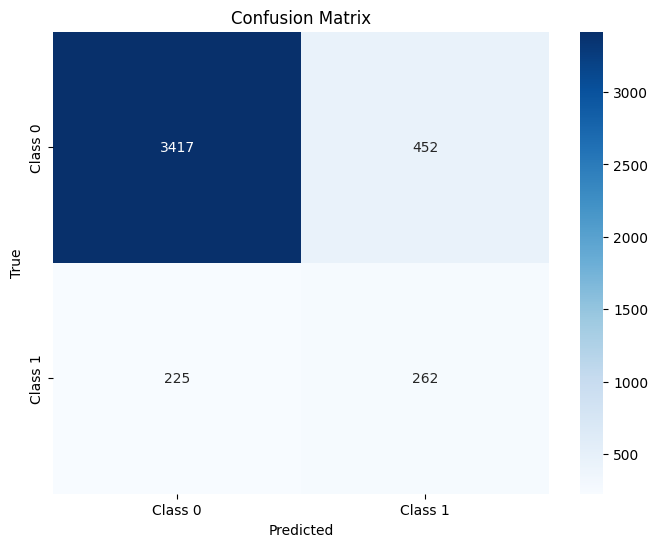

              precision    recall  f1-score   support

     Class 0       0.94      0.88      0.91      3869
     Class 1       0.37      0.54      0.44       487

    accuracy                           0.84      4356
   macro avg       0.65      0.71      0.67      4356
weighted avg       0.87      0.84      0.86      4356



In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your dataset features and labels
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
top_words = 10000
max_review_length = 600
# Tokenization
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_review_length)

X_test_padded = pad_sequences(X_test_sequences, maxlen=max_review_length)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the model
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))  # Additional Conv1D layer
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Larger Dense layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test_padded, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the labels for the test set
y_pred = model.predict(X_test_padded)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))


# Modification-1

Epoch 1/5
273/273 [==============================] - 41s 122ms/step - loss: 0.5958 - accuracy: 0.6772 - val_loss: 0.6443 - val_accuracy: 0.7284
Epoch 2/5
273/273 [==============================] - 15s 56ms/step - loss: 0.4265 - accuracy: 0.8423 - val_loss: 0.5189 - val_accuracy: 0.7672
Epoch 3/5
273/273 [==============================] - 10s 35ms/step - loss: 0.2907 - accuracy: 0.8847 - val_loss: 0.4492 - val_accuracy: 0.7922
Epoch 4/5
273/273 [==============================] - 9s 33ms/step - loss: 0.1977 - accuracy: 0.9196 - val_loss: 0.4648 - val_accuracy: 0.8095
Epoch 5/5
273/273 [==============================] - 8s 31ms/step - loss: 0.1415 - accuracy: 0.9412 - val_loss: 0.4928 - val_accuracy: 0.8124
137/137 - 1s - loss: 0.4928 - accuracy: 0.8124 - 723ms/epoch - 5ms/step

Test accuracy: 0.8124426007270813
137/137 [==============================] - 1s 4ms/step


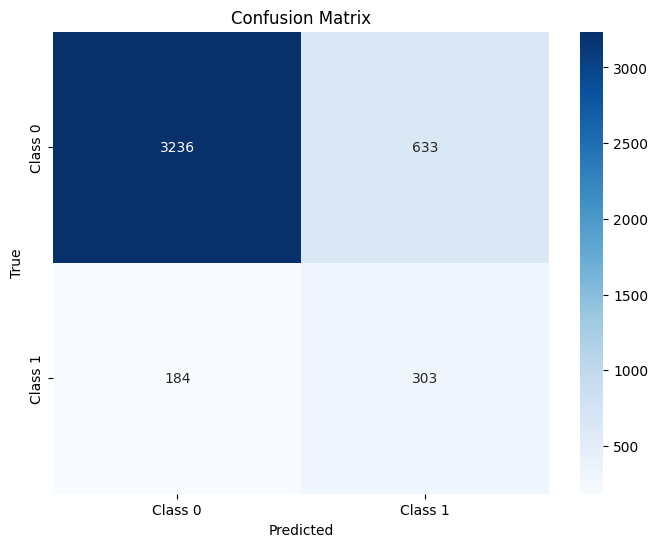

              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89      3869
     Class 1       0.32      0.62      0.43       487

    accuracy                           0.81      4356
   macro avg       0.63      0.73      0.66      4356
weighted avg       0.88      0.81      0.84      4356



In [5]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your dataset features and labels
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
top_words = 10000
max_review_length = 600
# Tokenization
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_review_length)

X_test_padded = pad_sequences(X_test_sequences, maxlen=max_review_length)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the model
embedding_vector_length=100
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))  # Additional Conv1D layer
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))  # Larger Dense layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test_padded, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the labels for the test set
y_pred = model.predict(X_test_padded)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))


# Modification-2

Epoch 1/5
273/273 [==============================] - 27s 89ms/step - loss: 0.5936 - accuracy: 0.6976 - val_loss: 0.5091 - val_accuracy: 0.8044
Epoch 2/5
273/273 [==============================] - 9s 34ms/step - loss: 0.4288 - accuracy: 0.8545 - val_loss: 0.4182 - val_accuracy: 0.8292
Epoch 3/5
273/273 [==============================] - 7s 26ms/step - loss: 0.2740 - accuracy: 0.9017 - val_loss: 0.4926 - val_accuracy: 0.8147
Epoch 4/5
273/273 [==============================] - 8s 28ms/step - loss: 0.1589 - accuracy: 0.9429 - val_loss: 0.5776 - val_accuracy: 0.8170
Epoch 5/5
273/273 [==============================] - 6s 23ms/step - loss: 0.0908 - accuracy: 0.9678 - val_loss: 0.7532 - val_accuracy: 0.8271
137/137 - 1s - loss: 0.4182 - accuracy: 0.8292 - 774ms/epoch - 6ms/step

Test accuracy: 0.8292011022567749
137/137 [==============================] - 1s 3ms/step


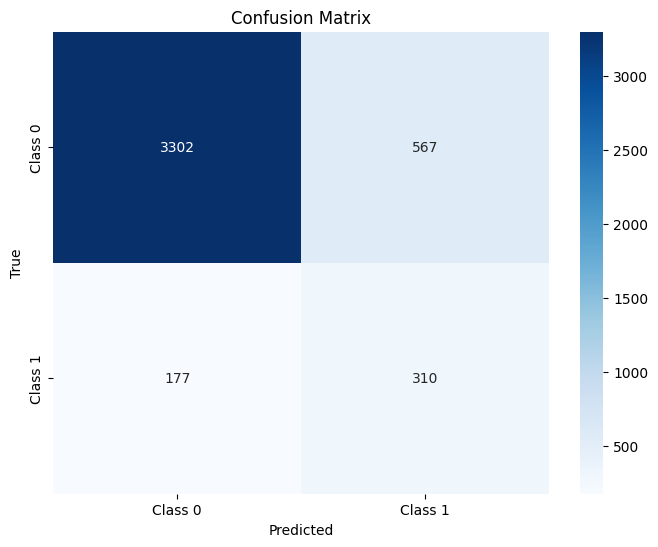

              precision    recall  f1-score   support

     Class 0       0.95      0.85      0.90      3869
     Class 1       0.35      0.64      0.45       487

    accuracy                           0.83      4356
   macro avg       0.65      0.75      0.68      4356
weighted avg       0.88      0.83      0.85      4356



In [8]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
top_words = 10000
max_review_length = 600

# Tokenization
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_review_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_review_length)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the model
embedding_vector_length = 100
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))  # Increase pool size from 2 to 4
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))  # Increase pool size from 2 to 4
model.add(Flatten())
model.add(Dense(64, activation='relu'))  # Increase Dense layer size to 128
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test_padded, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the labels for the test set
y_pred = model.predict(X_test_padded)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))
